In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Function

In [2]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

def balance(X_temp, y_temp):
  smote = SMOTE()
  X_temp, y_temp= smote.fit_resample(X_temp, y_temp)
  return pd.concat([pd.DataFrame(X_temp), pd.DataFrame(y_temp)], axis=1)



def models_check_box(models):
  import ipywidgets as widgets
  from IPython.display import display
  new_keys=[]
  for i in models:
    i=widgets.Checkbox(
      value=False,
      description=str(i),
      disabled=False,
      indent=False
      )
    display(i)
    new_keys.append(i)
  return new_keys

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Starting

In [3]:
import numpy as np
import pandas as pd
dataset=pd.read_excel("/content/drive/MyDrive/Iqram Sir/EEG_CNU_Resting, walking, working and Reading_Control_2022.12.30_1.xlsx")
#dataset=pd.read_excel("/content/EEG_CNU_Control_Resting, walking, working and Reading_2023.01.07.xlsx")

target = "Activity"
result = {}

In [6]:
dataset.head()

,Activity,Status,Epoch,MeanP_Alpha_Fz,MeanP_Beta_Fz,MeanP_Theta_Fz,MeanP_Delta_Fz,MeanP_Gamma_Fz,MeanP_Alpha_T7,MeanP_Beta_T7,...,pdBSI_gamma_T,pdBSI_T,DAR,DTR,DTABR,Relative Power_Alpha_Global,Relative Power_Beta_Global,Relative Power_Theta_Global,Relative Power_Delta_Global,Relative Power_Gamma_Global
0,1,Control,0,0.000008,0.000017,0.000008,0.000037,0.000006,0.000015,0.000047,...,0.459030,0.214583,12.438393,5.539580,5.283557,0.358154,0.639771,0.749628,4.031903,0.220545
1,1,Control,1,0.000010,0.000023,0.000009,0.000064,0.000008,0.000022,0.000059,...,0.330678,0.153688,8.122782,5.075034,3.541553,0.457695,0.806208,0.723662,3.759249,0.253186
2,1,Control,2,0.000008,0.000023,0.000006,0.000019,0.000007,0.000018,0.000065,...,0.401001,0.197538,7.248717,4.694718,2.869184,0.501419,1.059244,0.737332,3.320235,0.381769
3,1,Control,3,0.000011,0.000019,0.000010,0.000029,0.000006,0.000012,0.000038,...,0.395906,0.157050,8.925147,4.484127,4.446999,0.497909,0.710690,0.907816,3.653423,0.230162
4,1,Control,4,0.000007,0.000010,0.000007,0.000010,0.000002,0.000013,0.000028,...,0.430493,0.155118,13.888878,5.672066,6.891941,0.429825,0.569204,0.849345,4.001597,0.150029


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset[target]=encoder.fit_transform(dataset[target])

###Spliting into X and y

In [8]:
X =  dataset.loc[:,dataset.columns != target]  # removing Activity 
X =  X.loc[:,X.columns != "Status"]            # removing Status
X =  X.loc[:,X.columns != "Epoch"]             # removing Epoch
y = dataset["Activity"]

###USing SMOTE for balancing

In [9]:
new_dataset =  balance(X,y)

#Feature Selection

In [11]:
number_of_feat = 30

###ANOVA with f classifciation

In [12]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import pandas as pd



fs = SelectKBest(score_func=f_classif, k=5)
fit = fs.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)

featureScores.columns = ['Best_columns','Score_ANOVA'] 

lyst = featureScores.nlargest(number_of_feat,'Score_ANOVA')

#lyst.to_csv('Filter_Method_ANOVA_with_f_classif.csv')

list_of_feat = list(lyst["Best_columns"])

#Data Spliting

In [13]:
X_new = new_dataset[list_of_feat]
y_new = new_dataset[target]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2, random_state = 0)



---



# **Training**



---



#Graddient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

gradBoost_default = GradientBoostingClassifier(loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                               criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                               min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                               init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None,
                                               warm_start=False, validation_fraction=0.1,
                                               n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
gradBoost_default.fit(X_train, y_train)
y_pred = gradBoost_default.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_default,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[109  20  28   6]
 [ 22 111   6   6]
 [ 26  17 110  15]
 [ 10  11  18 120]]
              precision    recall  f1-score   support

           0       0.65      0.67      0.66       163
           1       0.70      0.77      0.73       145
           2       0.68      0.65      0.67       168
           3       0.82      0.75      0.78       159

    accuracy                           0.71       635
   macro avg       0.71      0.71      0.71       635
weighted avg       0.71      0.71      0.71       635

Accurecy:  0.7086614173228346


1/50 round completed......................... Accurecy: 0.510236220472441
2/50 round completed......................... Accurecy: 0.5181102362204725
3/50 round completed......................... Accurecy: 0.537007874015748
4/50 round completed......................... Accurecy: 0.5653543307086614
5/50 round completed......................... Accurecy: 0.5511811023622047
6/50 round completed......................... Accurecy: 0.573228346456693
7/50 round completed......................... Accurecy: 0.5858267716535434
8/50 round completed......................... Accurecy: 0.5984251968503937
9/50 round completed......................... Accurecy: 0.6
10/50 round completed......................... Accurecy: 0.6110236220472441
11/50 round completed......................... Accurecy: 0.6125984251968504
12/50 round completed......................... Accurecy: 0.6110236220472441
13/50 round completed......................... Accurecy: 0.6141732283464567
14/50 round completed..................

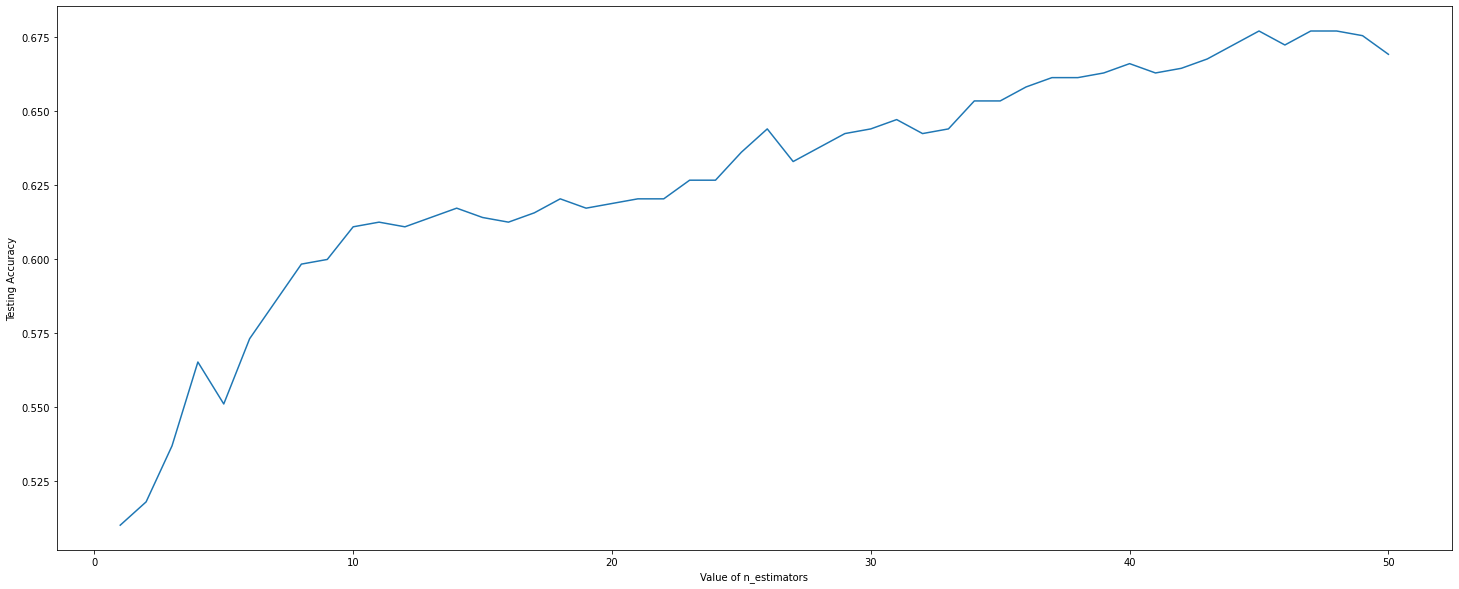

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=50
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/14 round completed......................... Accurecy: 0.5748031496062992
2/14 round completed......................... Accurecy: 0.6803149606299213
3/14 round completed......................... Accurecy: 0.7086614173228346
4/14 round completed......................... Accurecy: 0.7338582677165354
5/14 round completed......................... Accurecy: 0.7763779527559055
6/14 round completed......................... Accurecy: 0.7905511811023622
7/14 round completed......................... Accurecy: 0.7779527559055118
8/14 round completed......................... Accurecy: 0.7905511811023622
9/14 round completed......................... Accurecy: 0.7952755905511811
10/14 round completed......................... Accurecy: 0.7826771653543307
11/14 round completed......................... Accurecy: 0.7732283464566929
12/14 round completed......................... Accurecy: 0.7811023622047244
13/14 round completed......................... Accurecy: 0.768503937007874
14/14 round completed.

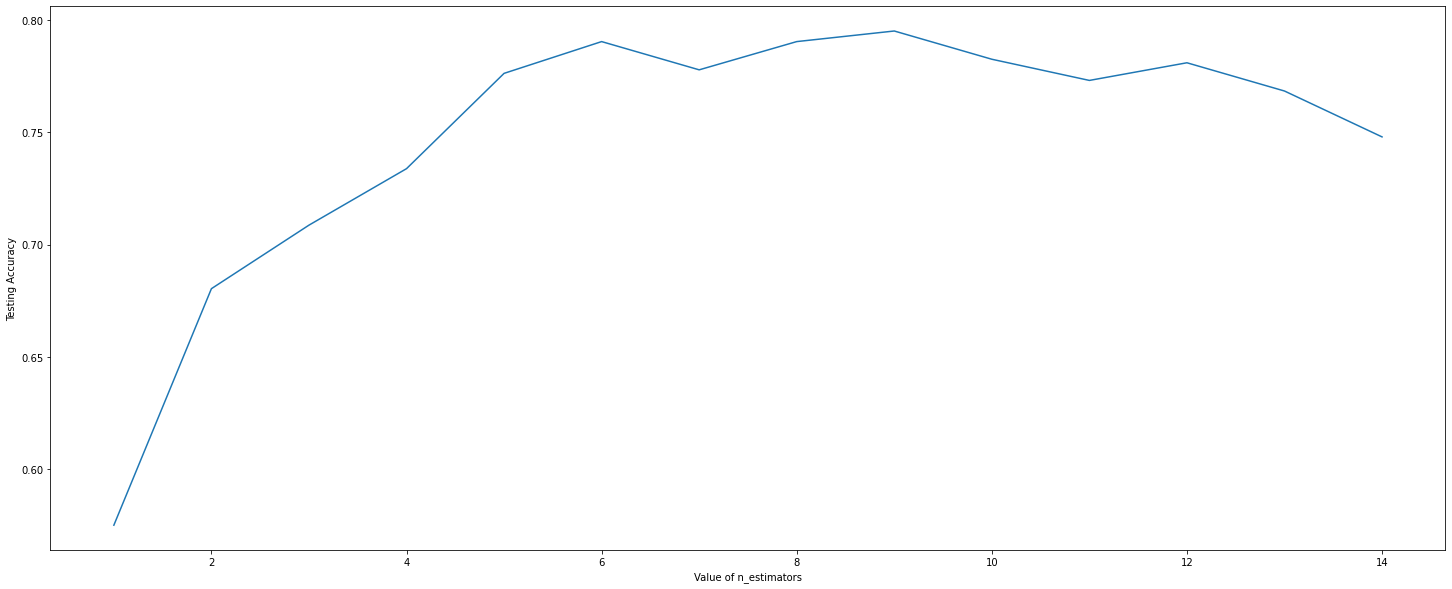

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=14
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_estimator = GradientBoostingClassifier(n_estimators=best_estimator,random_state=0)
gradBoost_estimator.fit(X_train, y_train)
y_pred = gradBoost_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_estimator,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[110  20  24   9]
 [ 27 102   9   7]
 [ 32  20 103  13]
 [ 12   6  26 115]]
              precision    recall  f1-score   support

           0       0.61      0.67      0.64       163
           1       0.69      0.70      0.70       145
           2       0.64      0.61      0.62       168
           3       0.80      0.72      0.76       159

    accuracy                           0.68       635
   macro avg       0.68      0.68      0.68       635
weighted avg       0.68      0.68      0.68       635

Accurecy:  0.6771653543307087


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_depth = GradientBoostingClassifier(max_depth=best_depth,random_state=0)
gradBoost_depth.fit(X_train, y_train)
y_pred = gradBoost_depth.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_depth,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[123  12  22   6]
 [ 21 117   6   1]
 [ 23   9 125  11]
 [ 10   2   7 140]]
              precision    recall  f1-score   support

           0       0.69      0.75      0.72       163
           1       0.84      0.81      0.82       145
           2       0.78      0.74      0.76       168
           3       0.89      0.88      0.88       159

    accuracy                           0.80       635
   macro avg       0.80      0.80      0.80       635
weighted avg       0.80      0.80      0.80       635

Accurecy:  0.7952755905511811


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_all = GradientBoostingClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
gradBoost_all.fit(X_train, y_train)
y_pred = gradBoost_all.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_all,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[117  18  19   9]
 [ 20 117   7   1]
 [ 24  12 123   9]
 [ 10   1  11 137]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       163
           1       0.79      0.81      0.80       145
           2       0.77      0.73      0.75       168
           3       0.88      0.86      0.87       159

    accuracy                           0.78       635
   macro avg       0.78      0.78      0.78       635
weighted avg       0.78      0.78      0.78       635

Accurecy:  0.7779527559055118




---



---



#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_default = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2,
                                    min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt',
                                    max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False,
                                    n_jobs=None, random_state=None,verbose=0, warm_start=False, class_weight=None, 
                                    ccp_alpha=0.0, max_samples=None)
rf_default.fit(X_train, y_train)
y_pred=rf_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_default,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[120  17  18   8]
 [ 21 117   5   2]
 [ 24   9 125  10]
 [  6   4   9 140]]
              precision    recall  f1-score   support

           0       0.70      0.74      0.72       163
           1       0.80      0.81      0.80       145
           2       0.80      0.74      0.77       168
           3       0.88      0.88      0.88       159

    accuracy                           0.79       635
   macro avg       0.79      0.79      0.79       635
weighted avg       0.79      0.79      0.79       635

Accurecy:  0.7905511811023622


1/150 round completed......................... Accurecy: 0.5968503937007874
2/150 round completed......................... Accurecy: 0.5937007874015748
3/150 round completed......................... Accurecy: 0.6519685039370079
4/150 round completed......................... Accurecy: 0.6740157480314961
5/150 round completed......................... Accurecy: 0.6929133858267716
6/150 round completed......................... Accurecy: 0.721259842519685
7/150 round completed......................... Accurecy: 0.7259842519685039
8/150 round completed......................... Accurecy: 0.7196850393700788
9/150 round completed......................... Accurecy: 0.7338582677165354
10/150 round completed......................... Accurecy: 0.7354330708661417
11/150 round completed......................... Accurecy: 0.7480314960629921
12/150 round completed......................... Accurecy: 0.752755905511811
13/150 round completed......................... Accurecy: 0.7448818897637796
14/150 rou

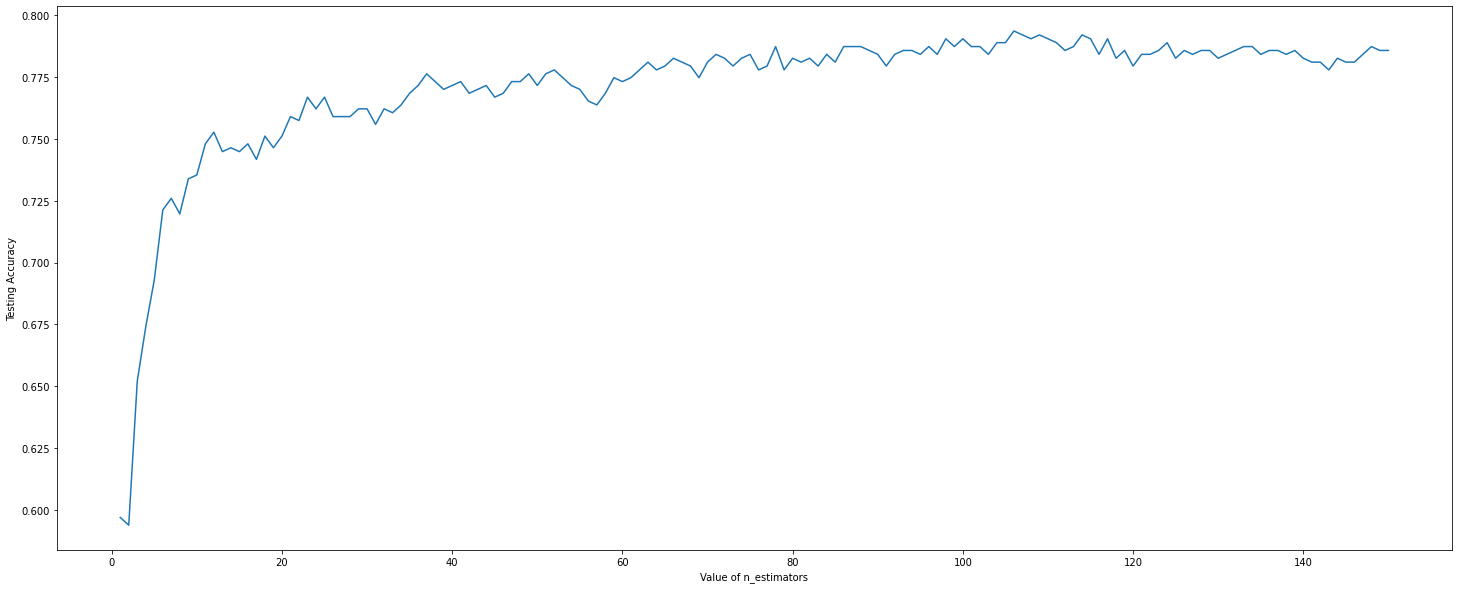

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/30 round completed......................... Accurecy: 0.3937007874015748
2/30 round completed......................... Accurecy: 0.5055118110236221
3/30 round completed......................... Accurecy: 0.5196850393700787
4/30 round completed......................... Accurecy: 0.5622047244094488
5/30 round completed......................... Accurecy: 0.6
6/30 round completed......................... Accurecy: 0.6299212598425197
7/30 round completed......................... Accurecy: 0.6724409448818898
8/30 round completed......................... Accurecy: 0.7118110236220473
9/30 round completed......................... Accurecy: 0.7244094488188977
10/30 round completed......................... Accurecy: 0.7480314960629921
11/30 round completed......................... Accurecy: 0.7637795275590551
12/30 round completed......................... Accurecy: 0.7622047244094489
13/30 round completed......................... Accurecy: 0.7748031496062993
14/30 round completed...............

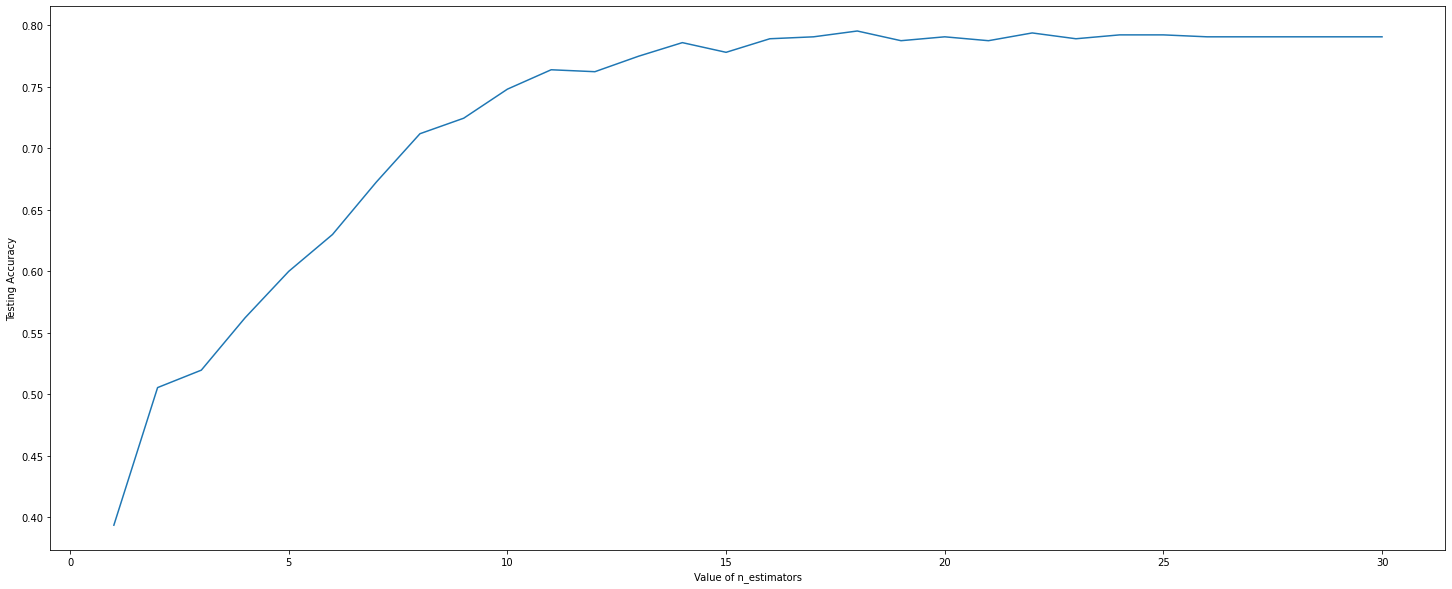

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_estimator = RandomForestClassifier(n_estimators=best_estimator,random_state=0)
rf_estimator.fit(X_train, y_train)
y_pred=rf_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_estimator,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[118  20  17   8]
 [ 17 121   5   2]
 [ 24   9 125  10]
 [  6   4   9 140]]
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       163
           1       0.79      0.83      0.81       145
           2       0.80      0.74      0.77       168
           3       0.88      0.88      0.88       159

    accuracy                           0.79       635
   macro avg       0.79      0.80      0.79       635
weighted avg       0.79      0.79      0.79       635

Accurecy:  0.7937007874015748


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_depth = RandomForestClassifier(max_depth=best_depth,random_state=0)
rf_depth.fit(X_train, y_train)
y_pred=rf_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_depth,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[118  19  18   8]
 [ 16 122   5   2]
 [ 23  11 124  10]
 [  5   5   8 141]]
              precision    recall  f1-score   support

           0       0.73      0.72      0.73       163
           1       0.78      0.84      0.81       145
           2       0.80      0.74      0.77       168
           3       0.88      0.89      0.88       159

    accuracy                           0.80       635
   macro avg       0.80      0.80      0.80       635
weighted avg       0.80      0.80      0.79       635

Accurecy:  0.7952755905511811


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_all = RandomForestClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_all,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[120  17  18   8]
 [ 15 123   5   2]
 [ 23  11 124  10]
 [  5   5   8 141]]
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       163
           1       0.79      0.85      0.82       145
           2       0.80      0.74      0.77       168
           3       0.88      0.89      0.88       159

    accuracy                           0.80       635
   macro avg       0.80      0.80      0.80       635
weighted avg       0.80      0.80      0.80       635

Accurecy:  0.8




---



---



#XGB

In [15]:
import xgboost as xgb
xgb_deafult = xgb.XGBClassifier(eta =1,min_child_weight=1,max_depth=6,
                                gamma = 0, max_delta_step = 0,subsample = 0, colsample_bytree = 1, 
                                colsample_bylevel = 1, alpha = 0,scale_pos_weight =1,random_state=0)


xgb_deafult.fit(X_train.values,y_train.values)
y_pred = xgb_deafult.predict(X_test.values)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_deafult,4,'xgboost')]=accuracy_score(y_test, y_pred)

[19:21:19] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[[163   0   0   0]
 [145   0   0   0]
 [168   0   0   0]
 [159   0   0   0]]
              precision    recall  f1-score   support

           0       0.26      1.00      0.41       163
           1       0.00      0.00      0.00       145
           2       0.00      0.00      0.00       168
           3       0.00      0.00      0.00       159

    accuracy                           0.26       635
   macro avg       0.06      0.25      0.10       635
weighted avg       0.07      0.26      0.10       635

Accurecy:  0.2566929133858268


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/350 round completed......................... Accurecy: 0.6110236220472441
26/350 round completed......................... Accurecy: 0.7480314960629921
51/350 round completed......................... Accurecy: 0.7732283464566929
76/350 round completed......................... Accurecy: 0.7905511811023622
101/350 round completed......................... Accurecy: 0.7921259842519685
126/350 round completed......................... Accurecy: 0.7921259842519685
151/350 round completed......................... Accurecy: 0.8031496062992126
176/350 round completed......................... Accurecy: 0.8015748031496063
201/350 round completed......................... Accurecy: 0.8047244094488188
226/350 round completed......................... Accurecy: 0.8078740157480315
251/350 round completed......................... Accurecy: 0.8078740157480315
276/350 round completed......................... Accurecy: 0.8078740157480315
301/350 round completed......................... Accurecy: 0.80787401

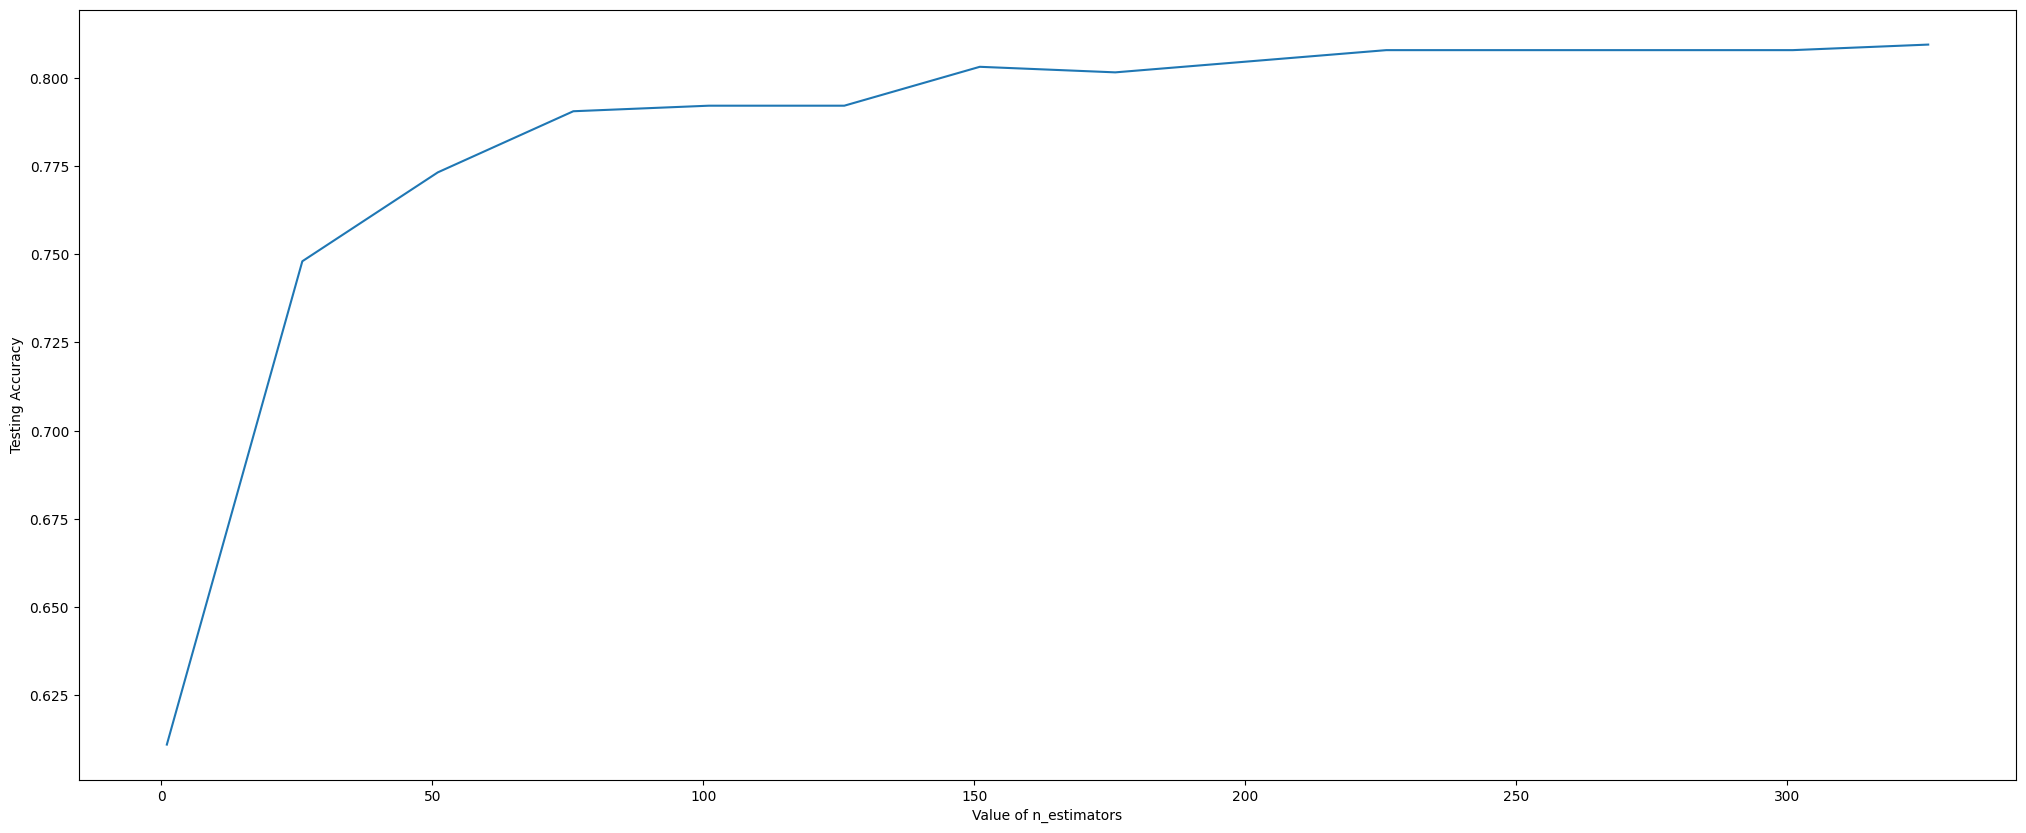

In [26]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=350
k_range = range (1,N+1,25)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(n_estimators=k,random_state=0)
  xgb_classifier.fit(X_train.values, y_train.values)
  y_pred=xgb_classifier.predict(X_test.values)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')

l = list(set(sorted(scores_list,reverse = True)))
hyper_est=[]
for i in l[0:4]:
  hyper_est.append(list(scores.keys())[scores_list.index(i)])

print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/30 round completed......................... Accurecy: 0.6031496062992125
6/30 round completed......................... Accurecy: 0.7921259842519685
11/30 round completed......................... Accurecy: 0.7905511811023622
16/30 round completed......................... Accurecy: 0.8141732283464567
21/30 round completed......................... Accurecy: 0.8173228346456692
26/30 round completed......................... Accurecy: 0.8047244094488188
The best depth:
21


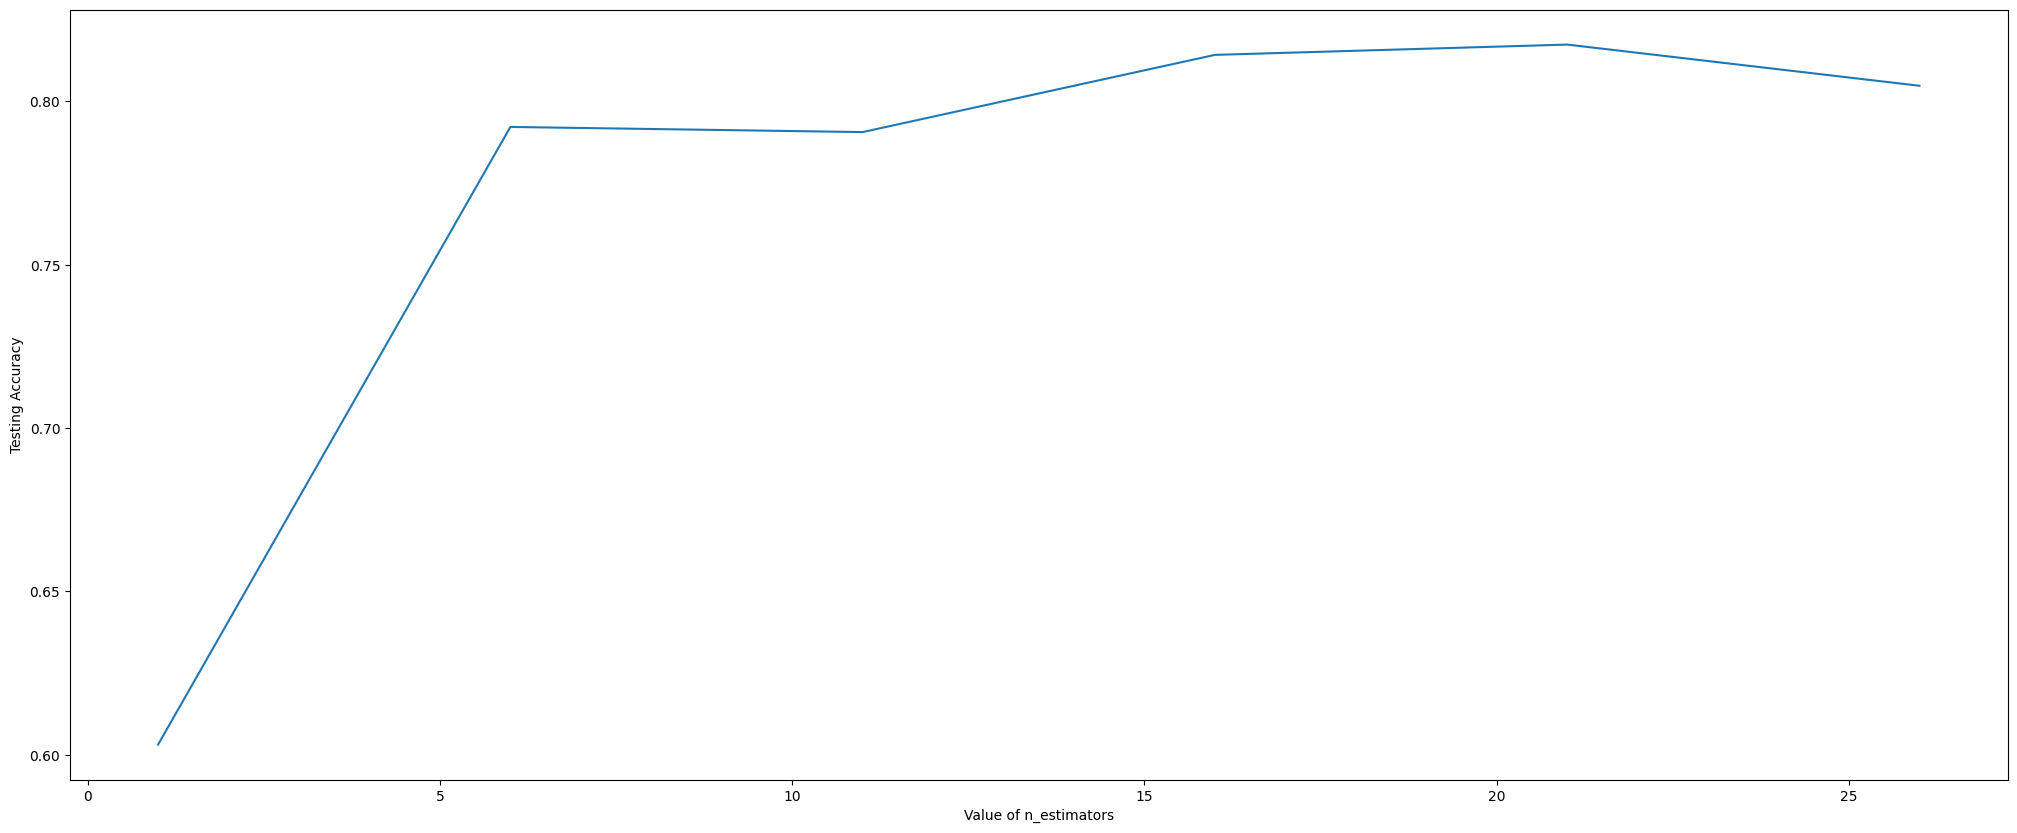

In [27]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1,5)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(max_depth=k,random_state=0)
  xgb_classifier.fit(X_train.values, y_train.values)
  y_pred=xgb_classifier.predict(X_test.values)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')


l = list(set(sorted(scores_list,reverse = True)))
hyper_dep=[]
for i in l[0:4]:
  hyper_dep.append(list(scores.keys())[scores_list.index(i)])


print("The best depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [20]:
import xgboost as xgb
xgb_depth = xgb.XGBClassifier(max_depth=best_depth,random_state=0)
xgb_depth.fit(X_train.values,y_train.values)
y_pred = xgb_depth.predict(X_test.values)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_depth,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_depth)

[[120  14  19  10]
 [ 10 131   2   2]
 [ 10  17 121  20]
 [  5   7   8 139]]
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       163
           1       0.78      0.90      0.83       145
           2       0.81      0.72      0.76       168
           3       0.81      0.87      0.84       159

    accuracy                           0.80       635
   macro avg       0.81      0.81      0.80       635
weighted avg       0.81      0.80      0.80       635

Accurecy:  0.8047244094488188
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None

In [21]:
import xgboost as xgb
xgb_estimator = xgb.XGBClassifier(n_estimators=best_estimator,random_state=0)
xgb_estimator.fit(X_train.values,y_train.values)
y_pred = xgb_estimator.predict(X_test.values)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_estimator,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_estimator)

[[119  16  18  10]
 [  6 135   1   3]
 [  8  17 125  18]
 [  4   7  10 138]]
              precision    recall  f1-score   support

           0       0.87      0.73      0.79       163
           1       0.77      0.93      0.84       145
           2       0.81      0.74      0.78       168
           3       0.82      0.87      0.84       159

    accuracy                           0.81       635
   macro avg       0.82      0.82      0.81       635
weighted avg       0.82      0.81      0.81       635

Accurecy:  0.8141732283464567
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None

In [22]:
import xgboost as xgb
xgb_all = xgb.XGBClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
xgb_all.fit(X_train.values,y_train.values)
y_pred = xgb_all.predict(X_test.values)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_all,4,'xgboost')]=accuracy_score(y_test, y_pred)

[[118  16  20   9]
 [  9 132   2   2]
 [  8  17 124  19]
 [  4   8   8 139]]
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       163
           1       0.76      0.91      0.83       145
           2       0.81      0.74      0.77       168
           3       0.82      0.87      0.85       159

    accuracy                           0.81       635
   macro avg       0.81      0.81      0.81       635
weighted avg       0.81      0.81      0.81       635

Accurecy:  0.8078740157480315


#Gradient Search CV

In [28]:
hyper_est

[326, 226, 151, 201]

In [29]:
hyper_dep

[21, 16, 26, 6]

In [31]:

search_space = {
    'n_estimators' : hyper_est,
    'max_depth' : hyper_dep,
    'gamma':[0.01,0.1],
    "learning_rate":[0.001,0.01,0.1,1]
}

In [ ]:
"""
import sklearn.metrics as k
print(*k.get_scorer_names(),sep='\n')"""

In [32]:

from xgboost import XGBRegressor
xgb = XGBRegressor()

In [33]:

from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(estimator = xgb,
                  param_grid = search_space,
                  scoring=['r2','neg_mean_squared_error'],
                  refit = 'r2',
                  cv = 5,
                  verbose =4)

In [34]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV 1/5] END gamma=0.01, learning_rate=0.001, max_depth=21, n_estimators=326; neg_mean_squared_error: (test=-1.442) r2: (test=-0.060) total time=   8.6s
[CV 2/5] END gamma=0.01, learning_rate=0.001, max_depth=21, n_estimators=326; neg_mean_squared_error: (test=-1.460) r2: (test=-0.240) total time=   7.0s
[CV 3/5] END gamma=0.01, learning_rate=0.001, max_depth=21, n_estimators=326; neg_mean_squared_error: (test=-1.361) r2: (test=-0.172) total time=   8.7s
[CV 4/5] END gamma=0.01, learning_rate=0.001, max_depth=21, n_estimators=326; neg_mean_squared_error: (test=-1.405) r2: (test=-0.148) total time=   8.6s
[CV 5/5] END gamma=0.01, learning_rate=0.001, max_depth=21, n_estimators=326; neg_mean_squared_error: (test=-1.495) r2: (test=-0.147) total time=   7.4s
[CV 1/5] END gamma=0.01, learning_rate=0.001, max_depth=21, n_estimators=226; neg_mean_squared_error: (test=-1.633) r2: (test=-0.201) total time=   6.3s
[CV 2/5] END gamma=

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'gamma': [0.01, 0.1],
                         'learning_rate': [0.001, 0.01, 0.1, 1],
                         'max_depth': [21, 16, 26, 6],
                         'n_estimators': [326, 226, 151, 201]},
             refit='r2', scoring=['r2', 'neg_mean_squared_error'], verbose=4)

In [35]:

print(gs.best_estimator_) 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.01, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=326, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


In [36]:
print(gs.best_params_)

{'gamma': 0.01, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 326}


In [37]:
print(gs.best_score_)

0.6751929346288563


In [38]:

df = pd.DataFrame(gs.cv_results_)
df = df.sort_values("rank_test_r2")
df.to_csv("hello.csv",index = False)